In [3]:
%matplotlib inline

import tensorflow as tf

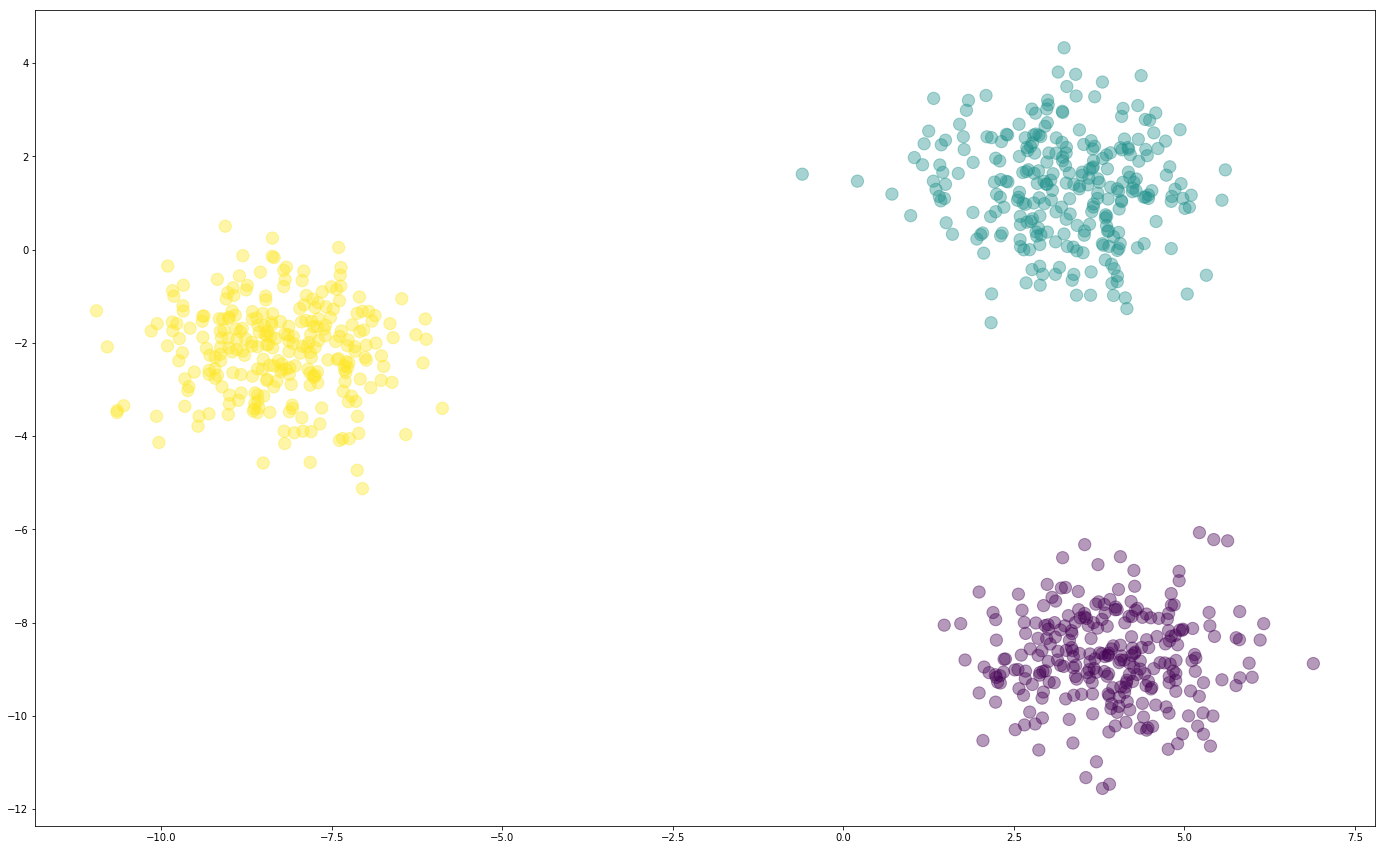

In [6]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

X_values, y_flat = make_blobs(n_features=2, n_samples=800, centers=3, random_state=500)
y = OneHotEncoder().fit_transform(y_flat.reshape(-1, 1)).todense()
y = np.array(y)

from matplotlib import pyplot as plt

# Optional line: Sets a default figure size to be a bit larger.
plt.rcParams['figure.figsize'] = (24, 15)

plt.scatter(X_values[:,0], X_values[:,1], c=y_flat, alpha=0.4, s=150)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_train_flat, y_test_flat = train_test_split(X_values, y, y_flat)

In [8]:
X_train

array([[-8.22982676, -2.45344382],
       [ 4.03568625,  1.25031179],
       [-8.62808438, -3.30050142],
       ...,
       [ 4.8166239 ,  1.13943782],
       [ 4.79155425, -8.8877719 ],
       [ 2.63572499,  0.99472777]])

In [9]:
X_test

array([[ -9.59472576,  -2.94189298],
       [  3.96311047,   0.27469449],
       [ -8.34520711,  -2.49222809],
       [  1.59997656,   0.32750032],
       [-10.05873351,  -1.58895265],
       [ -7.03296523,  -1.72758802],
       [  3.2462979 ,  -8.06924708],
       [ -8.13934303,  -1.82882328],
       [  4.76301161, -10.71629178],
       [  2.93568886,  -7.63511813],
       [  3.86893916,  -8.07766706],
       [  4.35311897, -10.26189004],
       [  4.0400828 ,  -9.79670224],
       [ -9.83717529,  -1.55422898],
       [  3.4019203 ,  -7.9975785 ],
       [  1.40604708,   1.14020828],
       [  2.71256539,   1.71187036],
       [  3.18206145,  -8.15642152],
       [  4.07603349,   1.0497403 ],
       [  5.11112061,  -8.81798002],
       [  4.06390019,  -8.80257725],
       [  2.56053072,  -9.00562993],
       [  3.10779295,  -8.31163941],
       [  2.30154247,  -9.29600561],
       [  4.18340549,   2.15153323],
       [  5.99361385,  -9.17197668],
       [ -7.36019517,  -1.74556731],
 

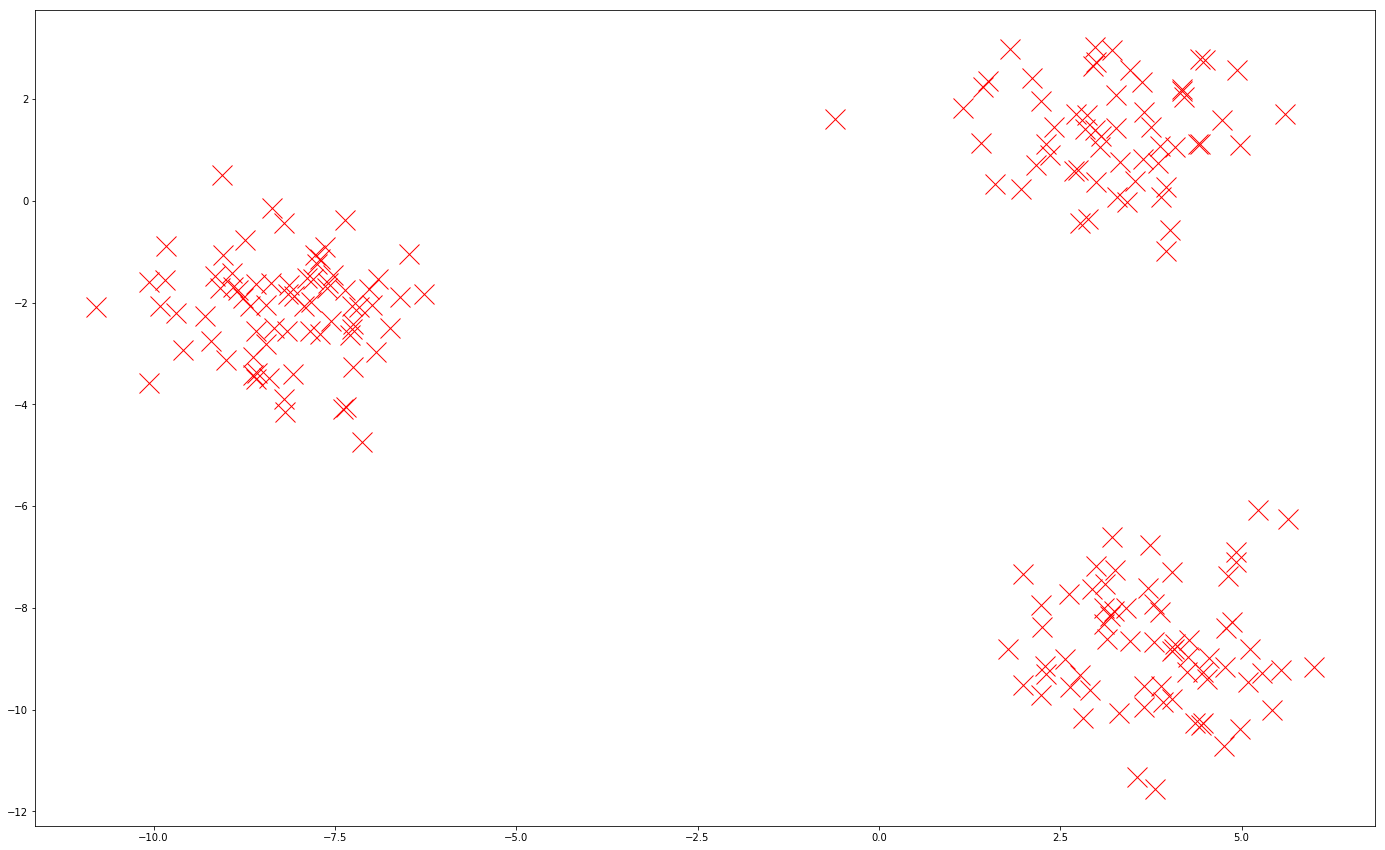

In [10]:
plt.plot(X_test[:,0], X_test[:,1], 'rx', markersize=20)

In [11]:
X_test += np.random.randn(*X_test.shape) * 1.5

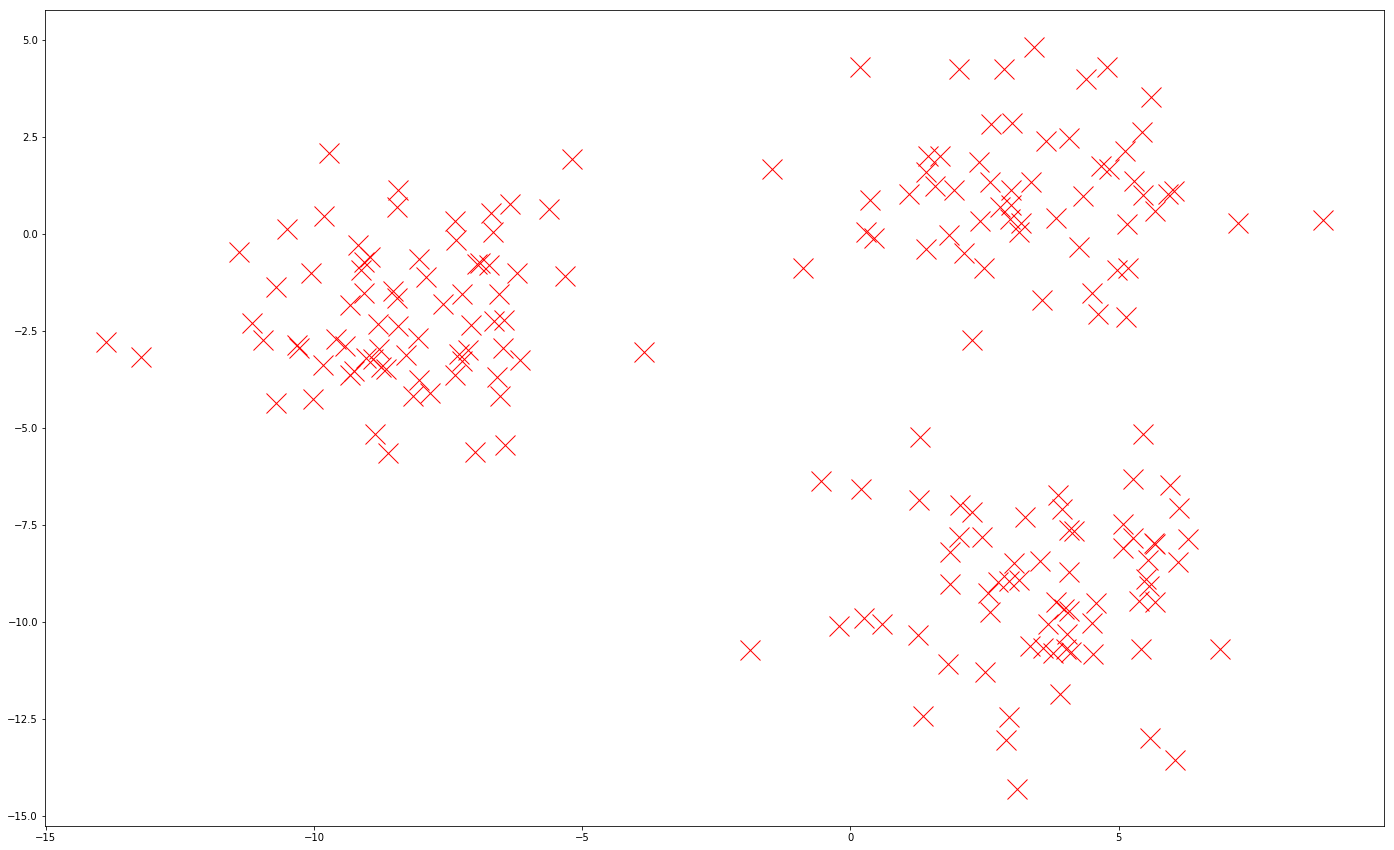

In [12]:
plt.plot(X_test[:,0], X_test[:,1], 'rx', markersize=20)

In [13]:
n_features = X_values.shape[1]

In [14]:
y_flat

array([2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0,

In [15]:
set(y_flat)

{0, 1, 2}

In [16]:
n_classes = len(set(y_flat))

In [17]:
n_features, n_classes

(2, 3)

In [18]:
weights_shape = (n_features, n_classes)

In [19]:
weights_shape

(2, 3)

In [20]:
W = tf.Variable(dtype=tf.float32, initial_value=tf.random_normal(weights_shape))  # Weights of the model

X = tf.placeholder(dtype=tf.float32)

Y_true = tf.placeholder(dtype=tf.float32)

bias_shape = (1, n_classes)
b = tf.Variable(dtype=tf.float32, initial_value=tf.random_normal(bias_shape))

Y_pred = tf.matmul(X, W)  + b

In [21]:
loss_function = tf.losses.softmax_cross_entropy(Y_true, Y_pred)

In [22]:
learner = tf.train.GradientDescentOptimizer(0.1).minimize(loss_function)

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        result = sess.run(learner, {X: X_train, Y_true: y_train})
        if i % 100 == 0:
            print("Iteration {}:\tLoss={:.6f}".format(i, sess.run(loss_function, {X: X_test, Y_true: y_test})))
    y_pred = sess.run(Y_pred, {X: X_test})
    W_final, b_final = sess.run([W, b])

Iteration 0:	Loss=5.956130
Iteration 100:	Loss=0.091473
Iteration 200:	Loss=0.077330
Iteration 300:	Loss=0.070962
Iteration 400:	Loss=0.067233
Iteration 500:	Loss=0.064749
Iteration 600:	Loss=0.062957
Iteration 700:	Loss=0.061591
Iteration 800:	Loss=0.060505
Iteration 900:	Loss=0.059615
Iteration 1000:	Loss=0.058869
Iteration 1100:	Loss=0.058230
Iteration 1200:	Loss=0.057674
Iteration 1300:	Loss=0.057183
Iteration 1400:	Loss=0.056747
Iteration 1500:	Loss=0.056354
Iteration 1600:	Loss=0.055997
Iteration 1700:	Loss=0.055672
Iteration 1800:	Loss=0.055373
Iteration 1900:	Loss=0.055096
Iteration 2000:	Loss=0.054840
Iteration 2100:	Loss=0.054600
Iteration 2200:	Loss=0.054376
Iteration 2300:	Loss=0.054166
Iteration 2400:	Loss=0.053968
Iteration 2500:	Loss=0.053780
Iteration 2600:	Loss=0.053603
Iteration 2700:	Loss=0.053434
Iteration 2800:	Loss=0.053274
Iteration 2900:	Loss=0.053121
Iteration 3000:	Loss=0.052975
Iteration 3100:	Loss=0.052835
Iteration 3200:	Loss=0.052701
Iteration 3300:	Loss=0

In [24]:
predicted_y_values = np.argmax(y_pred, axis=1)
predicted_y_values

array([2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       1, 1], dtype=int64)

In [25]:
h = 1
x_min, x_max = X_values[:, 0].min() - 2 * h, X_values[:, 0].max() + 2 * h
y_min, y_max = X_values[:, 1].min() - 2 * h, X_values[:, 1].max() + 2 * h
x_0, x_1 = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
decision_points = np.c_[x_0.ravel(), x_1.ravel()]

(-13.55525615089341, 5.44474384910659)

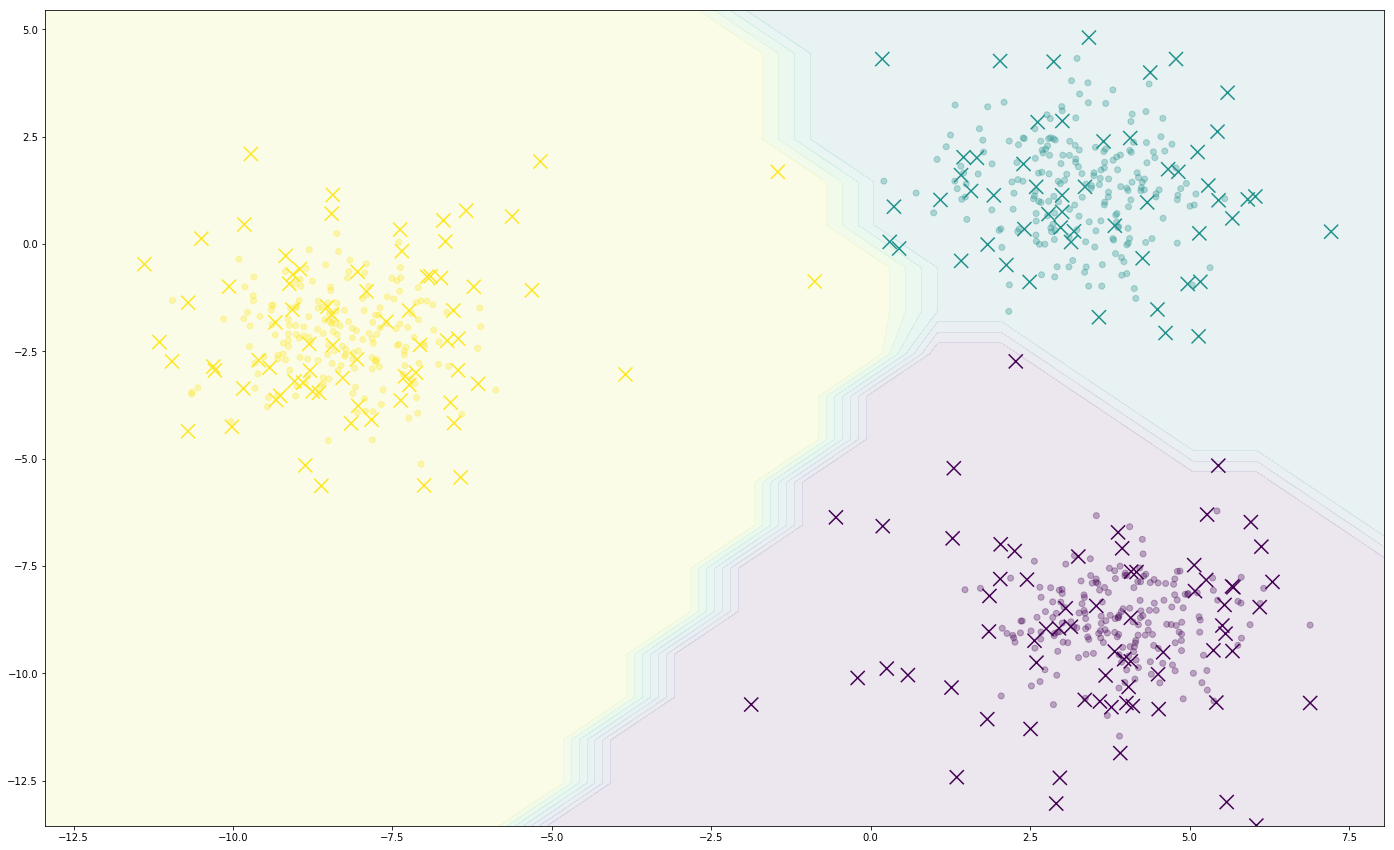

In [26]:
# We recreate our model in NumPy
Z = np.argmax(decision_points @ W_final[[0,1]] + b_final, axis=1)

# Create a contour plot of the x_0 and x_1 values
Z = Z.reshape(x_0.shape)
plt.contourf(x_0, x_1, Z, alpha=0.1)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train_flat, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_y_values, marker='x', s=200)

plt.xlim(x_0.min(), x_0.max())
plt.ylim(x_1.min(), x_1.max())